Importing Libraries

In [1]:
# Others
import nltk
import string
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from sklearn.manifold import TSNE

In [2]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec, FastText
from gensim.models.keyedvectors import KeyedVectors

loading data

In [3]:
import pandas as pd
import re
import string

In [4]:
data = pd.read_csv("dataset/hate_speech.tsv", sep='\t',header=None)

In [5]:
data.columns = ["text", "label"]

In [6]:
data.dropna(inplace=True)

In [7]:
data.reset_index(inplace=True)

In [8]:
data.head()

,index,text,label
0,0,Knowing ki Vikas kitna samjhata hai Priyanka a...,no
1,1,I am Muhajir .. Aur mere lye sab se Pehly Paki...,no
2,2,Doctor sab sahi me ke PhD (in hate politics) ...,no
3,3,Poore Desh me Patel OBC me aate Hain sirf gujr...,no
4,4,Sarkar banne ke bad Hindu hit me ek bhi faisla...,yes


In [9]:
def clean(text):
#     text = re.sub(r"http\S+", "", text)
    text = text.translate(str.maketrans('','',string.punctuation))
    text = text.lower()
    text = text.strip()
    text = text.translate(str.maketrans('','','1234567890'))
    
    return text

In [10]:
data["text"] = data["text"].apply(clean)

In [11]:
from nltk.tokenize import WordPunctTokenizer
from collections import Counter
from tensorflow.python.keras.preprocessing.text import Tokenizer

In [12]:
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(data["text"].values)
vocab_size = len(t.word_index) + 1

In [13]:
# setup tokenizer
tokenizer = WordPunctTokenizer()
vocab = Counter()

def tokenize(sentence):
    words = tokenizer.tokenize(sentence)
    vocab = Counter()
    return words

In [14]:
data["words"] = data["text"].apply(tokenize)

In [15]:
data.head()

,index,text,label,words
0,0,knowing ki vikas kitna samjhata hai priyanka a...,no,"[knowing, ki, vikas, kitna, samjhata, hai, pri..."
1,1,i am muhajir aur mere lye sab se pehly pakist...,no,"[i, am, muhajir, aur, mere, lye, sab, se, pehl..."
2,2,doctor sab sahi me ke phd in hate politics wa...,no,"[doctor, sab, sahi, me, ke, phd, in, hate, pol..."
3,3,poore desh me patel obc me aate hain sirf gujr...,no,"[poore, desh, me, patel, obc, me, aate, hain, ..."
4,4,sarkar banne ke bad hindu hit me ek bhi faisla...,yes,"[sarkar, banne, ke, bad, hindu, hit, me, ek, b..."


normalization

In [171]:
# Load
mapper = np.load('normalization/mapper.npy').item()

In [172]:
mapper

{'a': 'a',
 'ankhiyan': 'ankhiyan',
 'ankhiyaa': 'ankhiyaa',
 'ankhiya': 'ankhiyaa',
 'ankhiyaan': 'ankhiyaan',
 'ankhiyon': 'ankhiyon',
 'ankhon': 'ankhon',
 'ankhadiyon': 'ankhadiyon',
 'ang': 'ang',
 'angana': 'angana',
 'angaare': 'angaare',
 'angaaron': 'angaaron',
 'angiya': 'angiya',
 'anguthi': 'anguthi',
 'anguuthe': 'anguuthe',
 'anguthe': 'anguuthe',
 'anguur': 'anguur',
 'angoor': 'anguur',
 'angon': 'angon',
 'angadaeeyaan': 'angadaeeyaan',
 'angadaai': 'angadaai',
 'angadaayi': 'angadaai',
 'anchara': 'anchara',
 'antadiyon': 'antadiyon',
 'andaaz': 'andaaz',
 'andaz': 'andaaz',
 'andhkaar': 'andhkaar',
 'andha': 'andha',
 'andhaa': 'andha',
 'andhiyaara': 'andhiyaara',
 'andhiyara': 'andhiyaara',
 'andhiyaaraa': 'andhiyaara',
 'andhiyari': 'andhiyari',
 'andhiyaare': 'andhiyaare',
 'andhe': 'andhe',
 'andher': 'andher',
 'andheraa': 'andheraa',
 'andhera': 'andheraa',
 'andheri': 'andheri',
 'andhere': 'andhere',
 'ankhere': 'andhere',
 'andheron': 'andheron',
 'andhon':

In [17]:
# for word in t.word_index.keys():
#     if(word in mapper.keys()):
#         data["text"] = data["text"].replace({word: mapper[word]}, regex=True)

In [18]:
print("The vocabulary contains {} unique tokens".format(len(t.word_counts)))

The vocabulary contains 15290 unique tokens


In [19]:
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


Saving bin file as txt

In [20]:
# model = KeyedVectors.load('Embeddings/bin/w2v17:04.bin')
# model.wv.save_word2vec_format('Embeddings/vec/w2v17:04.txt', binary=False)

Loadin vectors and creating weight matrix

In [21]:
import io

def load_vectors(fname):
    fin = io.open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    n, d = map(int, fin.readline().split())
    data = {}
    for line in fin:
        tokens = line.rstrip().split(' ')
        data[tokens[0]] = list(map(float, tokens[1:]))
    return data

In [27]:
# create a weight matrix for the Embedding layer from a loaded embedding
def get_weight_matrix(embedding, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size+1, 64))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        embedding_vector = embedding.get(word)
        if embedding_vector is not None:
            weight_matrix[i] = embedding_vector
    
    return weight_matrix

In [28]:
len(data["text"].values)

4578

In [29]:
# raw_embedding_model = Word2Vec.load('Embeddings/bin/model_size_64mar30.bin')
# # raw_embedding_model.train(data["text"].values,total_examples=4578, epochs=1000)
# raw_embedding_model.wv.save_word2vec_format('Embeddings/vec/model_size_64mar30.txt', binary=False)

In [253]:
# load embedding from file
raw_embedding = load_vectors('Embeddings/vec/target_mapped.txt')

# get vectors in the right order
embedding_vectors = get_weight_matrix(raw_embedding, t.word_index)

In [254]:
# raw_embedding

In [255]:
len(embedding_vectors)

15292

CNN

In [256]:
import pandas as pd
pd.options.display.max_columns = 200
pd.options.mode.chained_assignment = None

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
stop = list(stop)
from string import punctuation
from functools import reduce
import itertools


import re
import numpy as np

import matplotlib.pyplot as plt

from tqdm import tqdm_notebook
tqdm_notebook().pandas()

%matplotlib inline

In [257]:
from tensorflow.python.keras.models import Sequential, Model
from tensorflow.python.keras.layers import GRU,Bidirectional, Dense, Dropout, GlobalMaxPool1D, SpatialDropout1D, Flatten, Input, MaxPooling1D, Convolution1D, LSTM, Embedding
from tensorflow.python.keras.layers.merge import Concatenate
from tensorflow.python.keras.datasets import imdb
from tensorflow.python.keras.regularizers import l2
from tensorflow.python.keras.preprocessing import sequence
np.random.seed(0)

In [258]:
# Keras
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation, TimeDistributed
from tensorflow.python.keras.layers.embeddings import Embedding

In [259]:
# data["label"] = data["label"].replace({'yes': 1}, regex=True)
# data["label"] = data["label"].replace({'no': 0}, regex=True)    

In [260]:
len(raw_embedding_model.wv.vocab)

12031

In [261]:
def load_data_and_labels():
    """
    Loads MR polarity data from files, splits the data into words and generates labels.
    Returns split sentences and labels.
    """
    # Load data from files
    examples = data['text']
    examples = list(examples)
    examples = [s.strip() for s in examples]
    
    # Split by words
    x_text = examples
    #x_text = [clean_str(sent) for sent in x_text]
    #x_text = [removeNonAscii(sent) for sent in x_text]
    x_text = [s.split(" ") for s in x_text]
    
    # Generate labels
    y = list(data['label'].map(lambda x : 1 if x=='yes' else 0))
    
#     print("load data and labels:", [len(x_text),len(y)])
    return [x_text, y]

In [262]:
def build_vocab(sentences):
    """
    Builds a vocabulary mapping from word to index based on the sentences.
    Returns vocabulary mapping and inverse vocabulary mapping.
    """
    # Build vocabulary
    word_counts = Counter(itertools.chain(*sentences))
    # Mapping from index to word
    vocabulary_inv = [x[0] for x in word_counts.most_common()]
    # Mapping from word to index
    vocabulary = {x: i for i, x in enumerate(vocabulary_inv)}
    
#     print("Vocabulary: ", len(vocabulary), len(vocabulary_inv))
    return [vocabulary, vocabulary_inv]

In [263]:
def build_input_data(sentences, labels, vocabulary):
    """
    Maps sentencs and labels to vectors based on a vocabulary.
    """
    x = np.array([[vocabulary[word] for word in sentence] for sentence in sentences])
    y = np.array(labels)
    
#     print("Build input data:", [len(x),len(y)])
    return [x, y]


In [264]:
def pad_sentences(sentences, padding_word="<PAD/>"):
    """
    Pads all sentences to the same length. The length is defined by the longest sentence.
    Returns padded sentences.
    """
    sequence_length = max(len(x) for x in sentences)
    padded_sentences = []
    for i in range(len(sentences)):
        sentence = sentences[i]
        num_padding = sequence_length - len(sentence)
        new_sentence = sentence + [padding_word] * num_padding
        padded_sentences.append(new_sentence)
        
   #  print("Padded sentences: ", len(padded_sentences))
    return padded_sentences

In [265]:
def preprocess_data():
    """
    Loads and preprocessed data for the MR dataset.
    Returns input vectors, labels, vocabulary, and inverse vocabulary.
    """
    # Load and preprocess data
    sentences, labels = load_data_and_labels()
    sentences_padded = pad_sentences(sentences)
    vocabulary, vocabulary_inv = build_vocab(sentences_padded)
    x, y = build_input_data(sentences_padded, labels, vocabulary)
#     print("Preprocess load data:", [len(x),len(y), len(vocabulary), len(vocabulary_inv)])
    return [x, y, vocabulary, vocabulary_inv]

In [266]:
def load_data():
    x, y, vocabulary, vocabulary_inv_list = preprocess_data()
    vocabulary_inv = {key: value for key, value in enumerate(vocabulary_inv_list)}
    
    # Shuffle data
    shuffle_indices = np.random.permutation(np.arange(len(y)))
    x = x[shuffle_indices]
    y = y[shuffle_indices]
    train_len = int(len(x) * 0.9)
    x_train = x[:train_len]
    y_train = y[:train_len]
    x_test = x[train_len:]
    y_test = y[train_len:]

    return x_train, y_train, x_test, y_test, vocabulary, vocabulary_inv

In [267]:
# Data Preparation
print("Load data...")
x_train, y_train, x_test, y_test, vocabulary, vocabulary_inv = load_data()

# if sequence_length != x_test.shape[1]:
#     print("Adjusting sequence length for actual size")
#     sequence_length = x_test.shape[1]

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("Vocabulary Size: {:d}".format(len(vocabulary_inv)))

Load data...
x_train shape: (4120, 67)
x_test shape: (458, 67)
Vocabulary Size: 15292


In [268]:
len(vocabulary_inv)

15292

In [269]:
vocab_size

15291

In [270]:
sequence_length = 67
embedding_dim = 64

In [281]:
def create_cnn():
    input_layer = Input((67, ))
#     embedding_layer = Embedding(15292, embedding_dim, input_length=sequence_length, name="embedding")(input_layer)
    embedding_layer = Embedding(vocab_size+1, embedding_dim, weights=[embedding_vectors], input_length=sequence_length, name="embedding",trainable=False)(input_layer)
    
    embedding_layer = SpatialDropout1D(0.3)(embedding_layer)

    # Add the convolutional Layer
    conv_layer = Convolution1D(10, 3, activation="relu")(embedding_layer)

    # Add the pooling Layer
    pooling_layer = GlobalMaxPool1D()(conv_layer)

    # Add the output Layers
    output_layer1 = Dense(40, activation="relu")(pooling_layer)
    output_layer1 = Dropout(0.25)(output_layer1)
    output_layer2 = Dense(1, activation="sigmoid")(output_layer1)

    # Compile the model
    model = Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer="adam", loss='binary_crossentropy', metrics=["accuracy"])
    
    return model

In [282]:
classifier = create_cnn()

In [283]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        (None, 67)                0         
_________________________________________________________________
embedding (Embedding)        (None, 67, 64)            978688    
_________________________________________________________________
spatial_dropout1d_26 (Spatia (None, 67, 64)            0         
_________________________________________________________________
conv1d_26 (Conv1D)           (None, 65, 10)            1930      
_________________________________________________________________
global_max_pooling1d_26 (Glo (None, 10)                0         
_________________________________________________________________
dense_52 (Dense)             (None, 40)                440       
_________________________________________________________________
dropout_26 (Dropout)         (None, 40)                0         
__________

In [284]:
history = classifier.fit(x_train, y_train, batch_size=20, epochs=15,
          validation_data=(x_test, y_test), verbose=2)

Train on 4120 samples, validate on 458 samples
Epoch 1/15
 - 4s - loss: 0.6614 - acc: 0.6383 - val_loss: 0.6636 - val_acc: 0.6135
Epoch 2/15
 - 1s - loss: 0.6526 - acc: 0.6400 - val_loss: 0.6536 - val_acc: 0.6135
Epoch 3/15
 - 1s - loss: 0.6264 - acc: 0.6738 - val_loss: 0.6085 - val_acc: 0.7009
Epoch 4/15
 - 1s - loss: 0.6049 - acc: 0.6976 - val_loss: 0.5951 - val_acc: 0.6900
Epoch 5/15
 - 1s - loss: 0.5924 - acc: 0.7015 - val_loss: 0.5962 - val_acc: 0.7031
Epoch 6/15
 - 1s - loss: 0.5868 - acc: 0.7019 - val_loss: 0.5892 - val_acc: 0.7074
Epoch 7/15
 - 1s - loss: 0.5792 - acc: 0.7129 - val_loss: 0.5856 - val_acc: 0.7052
Epoch 8/15
 - 1s - loss: 0.5761 - acc: 0.7129 - val_loss: 0.5871 - val_acc: 0.7052
Epoch 9/15
 - 1s - loss: 0.5645 - acc: 0.7182 - val_loss: 0.5806 - val_acc: 0.7009
Epoch 10/15
 - 1s - loss: 0.5666 - acc: 0.7204 - val_loss: 0.5928 - val_acc: 0.7096
Epoch 11/15
 - 1s - loss: 0.5600 - acc: 0.7141 - val_loss: 0.5841 - val_acc: 0.7096
Epoch 12/15
 - 1s - loss: 0.5549 - acc

In [285]:
# def create_conv_model():
#     model_conv = Sequential()
# #     model_conv.add(Embedding(13690, embedding_dim, input_length=sequence_length, name="embedding"))
#     model_conv.add(Embedding(vocab_size+1, embedding_dim, weights=[embedding_vectors], input_length=sequence_length, name="embedding",trainable=True))
#     model_conv.add(Dropout(0.5))
#     model_conv.add(Conv1D(32, 5, activation='relu'))
#     model_conv.add(MaxPooling1D(pool_size=2))
# #     model_conv.add(Bidirectional(LSTM(100)))
#     model_conv.add(GRU(100, activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01), activity_regularizer=l2(0.01), kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, implementation=1, return_sequences=False, return_state=False, go_backwards=False, stateful=False, unroll=False, reset_after=False))
# #     model_conv.add(Dense(5, activation="relu",kernel_regularizer=l2(0.1), bias_regularizer=l2(0.1)))
#     model_conv.add(Dense(1, activation='sigmoid'))
#     model_conv.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#     return model_conv

# model = create_conv_model()
# model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [286]:
# model.summary()

In [287]:
# # Train the model
# history = model.fit(x_train, y_train, batch_size=20, epochs=50,
#           validation_data=(x_test, y_test), verbose=2)

In [288]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


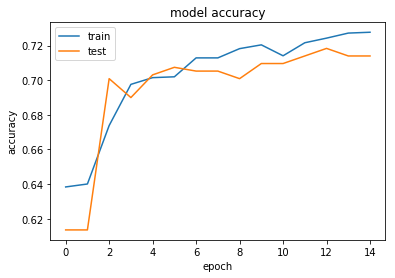

In [289]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

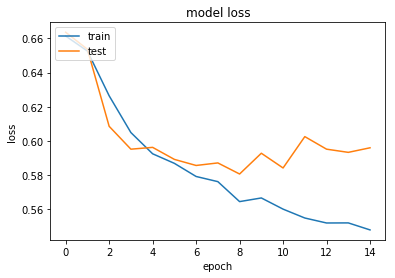

In [290]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [236]:
test_sentence = "aap jaiso ka iss desh me kaam nahi hai"

In [237]:
def prepare_new_sentence(sentence):
    
    #Load Vocabulary
    _, _, _, _, vocabulary, vocabulary_inv = load_data()
    
    #Data Pre Processing
#     sentence = clean_str(sentence)
#     sentence = removeNonAscii(sentence)
#     sentence = sentence.strip()
    sentence = clean(sentence)
    sentence = sentence.split(" ")
    
    #Padding
    sequence_length = 67
    num_padding = sequence_length - len(sentence)
    sentence = sentence + ["<PAD/>"] * num_padding
    
    #print(sentence)
    
    x_new = np.array([vocabulary[word] for word in sentence])
    
    return x_new

In [238]:
x_new = prepare_new_sentence(test_sentence)

In [239]:
# x_new = x_test[2]

y_new = classifier.predict(np.array([x_new,]))

print(y_new)

if(np.round(y_new) == 1):
    print("Yes")

else:
    print("No")

[[0.2916002]]
No
